# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

So, this is report capstone webscrapping using beautifulsoup.
this scrapping scrapped imdb website, to get data about film, like title, rating, voting and metascore.
data that i got can be used for analysing film

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [22]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [24]:
url_get.content[1:3]

b'\n<'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [25]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

Because the parameters that we wanna get are located in different location, so we can get each parameter by creating variabel for each parameter

In [26]:
table = soup.find('div',attrs={'class':'lister-list'})
total_film=table.find_all('div',attrs={'class':"lister-item mode-advanced"})
judul=table.find_all('h3',attrs={'class':"lister-item-header"})
voting=table.find_all('p',attrs={'class':"sort-num_votes-visible"})
imdb=table.find_all('div',attrs={'class':"inline-block ratings-imdb-rating"})
metascore=table.find_all('div',attrs={'class':"inline-block ratings-metascore"})

But, parameter/variable "metascore" has special condition, beacause not every film has this parameter, so, we di a special thing too

In [27]:
storage_metascore=[]
for i in range(0,len(metascore)):
    metascore=table.find_all('div',attrs={'class':"inline-block ratings-metascore"})
    metascore=metascore[i].text.split('\n')[1].strip()
    storage_metascore.append(metascore)

first, we create list that contains as many none numbers as length of rows 

Then, we got film index by using for loops and if else condition

After got list that contains 'none' items and index of metascore, we can subset to get list that 
in accordance with real condition in website

In [28]:
storage=[]
for i in range(0, len(total_film)):
    if "inline-block ratings-metascore" in str(total_film[i]):
        storage.append(i)
    else:
        pass
    
list_besar=[None]*len(total_film)

In [29]:
for c in range(0,len(storage_metascore)):
    list_besar[storage[c]]=storage_metascore[c]

In [30]:
judul_film=[]
jumlah_voting=[]
rating_imdb=[]
for i in range(0, len(total_film)):
    judul=table.find_all('h3',attrs={'class':"lister-item-header"})
    judul=judul[i].text.split('\n')[2]
    judul_film.append(judul)
    
    voting=table.find_all('p',attrs={'class':"sort-num_votes-visible"})
    voting=voting[i].text.split('\n')[2]
    jumlah_voting.append(voting)
    
    imdb=table.find_all('div',attrs={'class':"inline-block ratings-imdb-rating"})
    imdb=imdb[i].text.split('\n')[2]
    rating_imdb.append(imdb)

after we got all lists, the we create dataframe by using zip() to merge/concate list

## Creating data frame & Data wrangling

In [31]:
pd.DataFrame()

""


In [32]:
df = pd.DataFrame(list(zip( jumlah_voting, rating_imdb, list_besar)), 
               columns =[ 'jumlah_voting', 'rating_imdb','metascore'],
                 index=judul_film)
df

,jumlah_voting,rating_imdb,metascore
The Mandalorian,"218,408",8.7,None
His Dark Materials,"42,067",7.9,None
The Boys,"217,545",8.7,None
Dreamland,"1,162",5.7,57
Jojo Rabbit,"277,631",7.9,58
Servant,"15,853",7.6,None
Wayne,"8,496",8.4,None
The Gentlemen,"207,408",7.8,51
Undercover,"9,405",7.9,None
The Witcher,"282,584",8.2,None


The data types must be set in their best types

In [33]:
df.dtypes

jumlah_voting    object
rating_imdb      object
metascore        object
dtype: object

But, in parameter 'metascore', not evry rows has this parameter, so, i decided to set the rows that dont have 'metascore' data by "Nan", and set 'float' for data type

Why do i let 'Nan' data? i thought that i couldn't replace Nan with several methods for handling the data, like forward fill, backward fill, mean, median etc. Because taht not make sense for replacing that Nan with that methods

In [34]:
df['rating_imdb']=df['rating_imdb'].astype(float)
df['jumlah_voting']=df['jumlah_voting'].str.replace(',', '').astype(int)
df['metascore']=df['metascore'].astype(float)

In [35]:
df2=df.head(7)
df2

,jumlah_voting,rating_imdb,metascore
The Mandalorian,218408,8.7,NaN
His Dark Materials,42067,7.9,NaN
The Boys,217545,8.7,NaN
Dreamland,1162,5.7,57.0
Jojo Rabbit,277631,7.9,58.0
Servant,15853,7.6,NaN
Wayne,8496,8.4,NaN


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:>

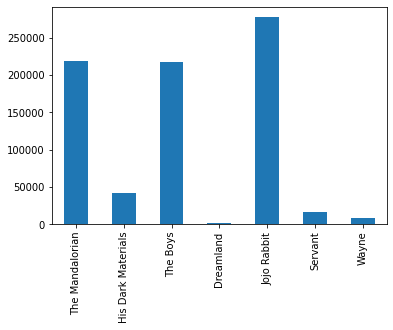

In [36]:
df2['jumlah_voting'].plot(kind='bar')

<AxesSubplot:>

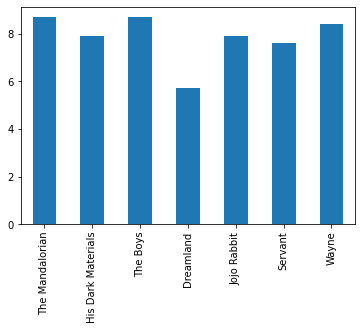

In [37]:
df2['rating_imdb'].plot(kind='bar')

<AxesSubplot:>

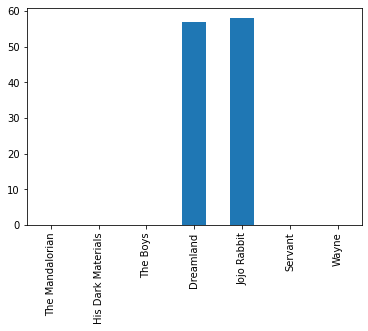

In [38]:
df2['metascore'].plot(kind='bar')

3 bar plots above show number of voting, imdb rating and metascore from top 7 popular films in imbd that ordered from the first to the last in 2019

But, Surely i can't find what parameter they used to calculate popularity, because they don't spill it
And then, there are too little paramaters that we got to correlate it

So, i will analyse correlation of top 5 most voting films and their imdb rating

In [39]:
top_5_voting = pd.DataFrame(list(zip( judul_film,jumlah_voting, rating_imdb, list_besar)), 
               columns =['judul_film','jumlah_voting', 'rating_imdb','metascore'])
top_5_voting['rating_imdb']=top_5_voting['rating_imdb'].astype(float)
top_5_voting['jumlah_voting']=top_5_voting['jumlah_voting'].str.replace(',', '').astype(int)
top_5_voting['metascore']=top_5_voting['metascore'].astype(float)

In [40]:
top_5_voting=top_5_voting.sort_values(by='jumlah_voting',ascending=False).head(5)

In [41]:
top_5_voting

,judul_film,jumlah_voting,rating_imdb,metascore
13,Joker,900149,8.5,59.0
14,Avengers: Endgame,782437,8.4,78.0
12,Once Upon a Time... in Hollywood,530749,7.6,83.0
20,Chernobyl,513461,9.4,NaN
11,Gisaengchung,512037,8.6,96.0


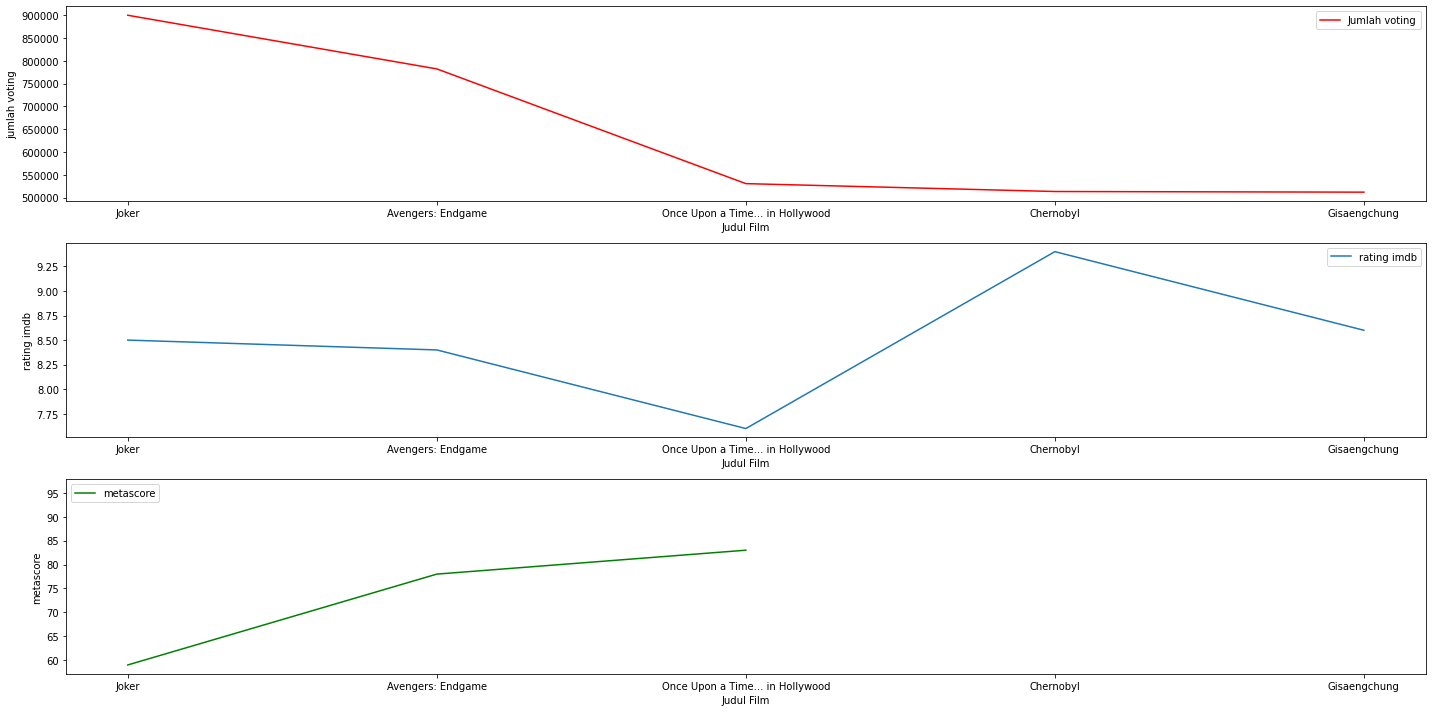

In [42]:
fig,ax=plt.subplots(nrows=3,ncols=1,figsize=(20,10))
ax[0].plot(top_5_voting['judul_film'],top_5_voting['jumlah_voting'],label='Jumlah voting',color='r')
ax[0].set_xlabel('Judul Film')
ax[0].set_ylabel('jumlah voting')
ax[0].legend()
ax[1].plot(top_5_voting['judul_film'],top_5_voting['rating_imdb'],label='rating imdb')
ax[1].set_xlabel('Judul Film')
ax[1].set_ylabel('rating imdb')
ax[1].legend()
ax[2].plot(top_5_voting['judul_film'],top_5_voting['metascore'],label='metascore',color='g')
ax[2].set_xlabel('Judul Film')
ax[2].set_ylabel('metascore')
ax[2].legend()
plt.tight_layout()

we can see that from table that no correlation between those parameters, except avengers:endgame that has good score from 3 parameters. it's reasonable because, as we know, 'end game' is a great film from marvel that have so many fans from around the world, and that film is closing film for MCU's 3rd phase.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.